#### Explore AI Academy: Unsupervised Learning Project



<div style="font-size: 35px">
    <font color='Maroon'> <b>Anime Recommender System Project</b></font> 

![anime_collage](image.png)


<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview**](#chapter1)
    * [1.1 Introduction**](#section_1_1)
        * [1.1.1 Problem Statement**](#sub_section_1_1_1)
    * [1.2 Objectives**](#section_1_2)
* <b>[2. Importing Packages**](#chapter2)
* <b>[3. Loading Data**](#chapter3)
* <b>[4. Data Cleaning**](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)**](#chapter5)
* <b>[6. Feature Engineering**](#chapter6)</b>
* [7. Modeling](#chapter7)
* [8. Model Performance](#chapter8)
* [9. You will learn more in Machine Learning Sprints](#chapter9)
* <b>[10. Conclusion**](#chapter10)</b>
* [11. References](#chapter11)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>




> <b> Objective of the Project:</b>  Build a collaborative and content-based recommender system for a collection of anime titles, capable 
of accurately predicting how a user will rate an anime title they have not yet viewed, based on their 
historical preferences.

> <b> Data Source:</b> Mention where the data comes from, including specifics about the dataset such as the period it covers, who collected it, and any important features or variables it includes. This establishes the context and relevance of the data.

> <b> Importance of the Study:</b> Explain why this project is important. Discuss its relevance or impact in its field, whether it’s improving a business process, advancing scientific understanding, or influencing policy decisions.

> <b> Key Questions or Hypotheses:</b> Outline the main questions you aim to answer or hypotheses you plan to test. This sets clear goals for your analysis and what the audience can expect to learn.

> <b> Methodology Overview:</b> Provide a brief overview of the methods and techniques you plan to use in your analysis. This doesn’t need to be detailed here but should give a taste of the analytical approach and tools.

> <b> Structure of the Notebook:</b> Describe the layout of the notebook. Explain the sections or parts of the analysis to help readers navigate through the content.

> <b> Expected Outcomes:</b> If applicable, mention what kind of results or findings you anticipate. This could be specific insights, predictive model performance, or impact assessment.

- #### 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>

### 1.2 Objectives <a class="anchor" id="section_1_2"></a>

You can choose to include all of this information in the introduction or distribute it across various sections. Key points to remember:

+ To apply exploratory data analysis.
+ To implement feature engineering techniques to extract meaningful information.
+ To model and assess various supervised machine learning algorithms for the prediction ....

## 2. Importing Packages <a class="anchor" id="chapter2"></a>

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in July 2022 containing data available in the United States.

+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [1]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

import operator # <-- Convenient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

# displays unlimited number of columns
pd.set_option("display.max_columns", 100)

## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the `titles.csv` file. To better manipulate and analyse the `titles.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `titles_import`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

#### Anime data

In [44]:
# loading dataset
df = pd.read_csv("anime.csv", index_col=False)
df.head()
anime = df.copy()
# Displays the number of rows and columns
anime.shape

(12294, 7)

In [45]:
## Display summary information about the DataFrame.
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [46]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


#### Training data

In [47]:
#training data
df = pd.read_csv("train.csv", index_col=False)
train = df.copy()
train.shape

(5703555, 3)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703555 entries, 0 to 5703554
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB


In [49]:
train.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [50]:
train.head()

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


The dataset consists of 12294 rows of different anime title. There are null in aniem data, training/ user data seems to be well populated with no null, we will check for duplicates.

In [51]:
#git ignore train csv too large for github 

## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

**Check nulls**

The `check_null_values` function iterates over each column in a DataFrame to identify and print the count of null values, providing column-specific null counts.

In [52]:
def check_null_values(df_copy):
    for column in df_copy:
        if df_copy[column].isnull().any():
            print('{0} has {1} null values'.format(column, df_copy[column].isnull().sum()))

In [53]:
check_null_values(anime)

genre has 62 null values
type has 25 null values
rating has 230 null values


In [54]:
anime = anime.dropna() 
anime = anime.reset_index(drop=True) 

In [55]:
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

About 277 null rows have been deleted

**Duplicates**

The `count_duplicate_rows` function checks a DataFrame for duplicate entries by utilizing the duplicated method, which identifies duplicates, and then summarizes the total number of duplicate rows. This function is useful for data cleaning processes, ensuring uniqueness in datasets by returning the count of duplicate rows.

In [56]:
def count_duplicate_rows(df_copy):
    duplicate_count = df_copy.duplicated().sum()
    return duplicate_count


In [57]:
count_duplicate_rows(anime)

np.int64(0)

In [58]:
count_duplicate_rows(train)

#one duplicate, remove

np.int64(1)

**Remove noise**

Initial we though to remvove punctuations and numbers from the data, but this causes errors down the line. We only trim the leading and training spaces.

In [59]:
def remove_numbers_punctuation(text):
    # Remve numbers
    #text = re.sub(r'\d+', '', text)
    # Remove punctuation
    #text = re.sub(r'[^\w\s]', '', text)

    text = text.strip()
    return text

In [60]:
import re
anime['name'] = anime['name'].apply(remove_numbers_punctuation)
train = pd.merge(train, anime[['anime_id','name']], on = 'anime_id', how ='left')
train = train.dropna() 
train = train.reset_index(drop=True) 

In [61]:
train.isna().sum()

user_id     0
anime_id    0
rating      0
name        0
dtype: int64

##### <a href=#cont>Back to Table of Contents</a>

---

## 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.
 

---

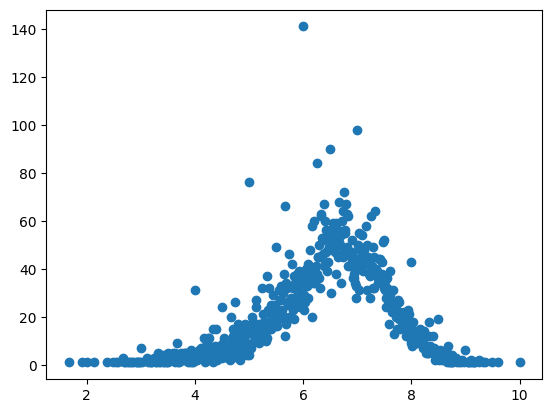

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

x = anime.groupby('rating').count().reset_index()[['rating','anime_id']]
x.head()
plt.scatter(x.rating,x.anime_id)
#plt.hist(x.rating, bins=10)
#sns.kde(x.rating
plt.show()
#distribution of ratings

Average rating in dataset: 7.808690544756735


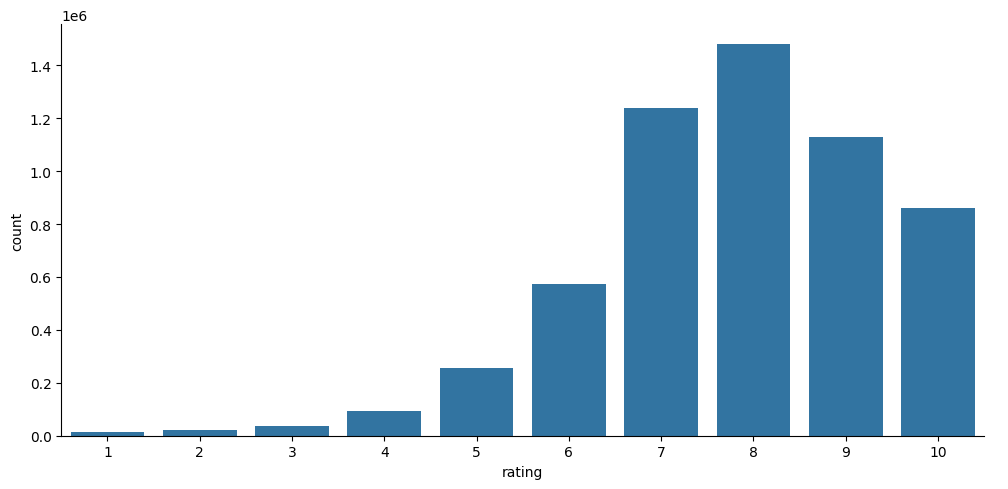

In [63]:
sns.catplot(data=train, x="rating", y=None, aspect=2.0, kind='count')
print(f'Average rating in dataset: {np.mean(df["rating"])}')
plt.show()

##### <a href=#cont>Back to Table of Contents</a>

---

### 6. Modelling <a class="anchor" id="chapter7"></a>

#### 6.1 Content Based Filtering

Merge anime name and genre description for completeness, so that if generes are different but names are similar that too is consiered whne computing the simularity score

In [64]:
anime['tags'] = (pd.Series(anime[['name', 'genre']]
                      .fillna('')
                      .values.tolist()).str.join(', '))

In [65]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members,tags
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"Kimi no Na wa., Drama, Romance, School, Supern..."
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"Fullmetal Alchemist: Brotherhood, Action, Adve..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"Gintama°, Action, Comedy, Historical, Parody, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"Steins;Gate, Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"Gintama&#039;, Action, Comedy, Historical, Par..."


In [66]:
indices = pd.Series(anime.index, index=anime['name'])

In [67]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0.0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(anime['tags'])

In [68]:
cosine_sim_Tags = cosine_similarity(tf_authTags_matrix, 
                                        tf_authTags_matrix)
print (cosine_sim_Tags.shape)

(12017, 12017)


In [69]:
np.min(cosine_sim_Tags)

np.float64(0.0)

In [70]:
display(indices)

name
Kimi no Na wa.                                            0
Fullmetal Alchemist: Brotherhood                          1
Gintama°                                                  2
Steins;Gate                                               3
Gintama&#039;                                             4
                                                      ...  
Toushindai My Lover: Minami tai Mecha-Minami          12012
Under World                                           12013
Violence Gekiga David no Hoshi                        12014
Violence Gekiga Shin David no Hoshi: Inma Densetsu    12015
Yasuji no Pornorama: Yacchimae!!                      12016
Length: 12017, dtype: int64

In [71]:
def content_generate_top_N_recommendations(title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_Tags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    book_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return anime.iloc[book_indices]

In [72]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members,tags
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"Kimi no Na wa., Drama, Romance, School, Supern..."
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"Fullmetal Alchemist: Brotherhood, Action, Adve..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"Gintama°, Action, Comedy, Historical, Parody, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"Steins;Gate, Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"Gintama&#039;, Action, Comedy, Historical, Par..."


In [73]:
content_generate_top_N_recommendations("Kimi no Na wa.", N=10)

,anime_id,name,genre,type,episodes,rating,members,tags
1907,2926,Myself; Yourself,"Drama, Romance, School",TV,13,7.41,115075,"Myself; Yourself, Drama, Romance, School"
11197,5643,Kimi no Na wo Yobeba,"Hentai, School",OVA,2,6.57,2189,"Kimi no Na wo Yobeba, Hentai, School"
3912,17585,Myself ; Yourself Specials,"Drama, Romance, School",Special,2,6.85,4128,"Myself ; Yourself Specials, Drama, Romance, Sc..."
404,11739,Kimi to Boku. 2,"Comedy, Drama, Romance, School, Shounen, Slice...",TV,13,8.11,44564,"Kimi to Boku. 2, Comedy, Drama, Romance, Schoo..."
764,10460,Kimi to Boku.,"Comedy, Drama, Romance, School, Shounen, Slice...",TV,13,7.85,86196,"Kimi to Boku., Comedy, Drama, Romance, School,..."
4570,31716,Rewrite,"Action, Comedy, Romance, School, Supernatural",TV,13,6.69,71545,"Rewrite, Action, Comedy, Romance, School, Supe..."
4839,1793,Kaze no Na wa Amnesia,"Action, Dementia, Drama, Sci-Fi",Movie,1,6.62,8230,"Kaze no Na wa Amnesia, Action, Dementia, Drama..."
5803,547,Wind: A Breath of Heart OVA,"Drama, Romance, School, Supernatural",OVA,3,6.35,2043,"Wind: A Breath of Heart OVA, Drama, Romance, S..."
6391,546,Wind: A Breath of Heart (TV),"Drama, Romance, School, Supernatural",TV,13,6.14,7778,"Wind: A Breath of Heart (TV), Drama, Romance, ..."


**Rating estimation functions**

In [105]:
def content_generate_rating_estimate(title, user, rating_data, k=10, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    #print(title)
    b_idx = indices[title]
    #print(b_idx)
    neighbors = [] # <-- Stores our collection of similarity values 
     
    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['user_id']==user].iterrows():
        #print(row['name'])
        #print(b_idx-1, indices[row['name']]-1)
        sim = cosine_sim_Tags[b_idx-1, indices[row['name']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['name']== title]['rating'])
    return predictedRating

**Testing**

In [75]:
# Subset of ratings from user 314
data = train[train['user_id'] == 3]
#data = pd.merge(data, anime[['anime_id','name']], on = 'anime_id', how ='left')
data

,user_id,anime_id,rating,name
4,3,20,8,Naruto
5,3,170,9,Slam Dunk
6,3,199,10,Sen to Chihiro no Kamikakushi
7,3,225,9,Dragon Ball GT
8,3,341,6,Spiral: Suiri no Kizuna
...,...,...,...,...
84,3,28701,9,Fate/stay night: Unlimited Blade Works 2nd Season
85,3,28891,9,Haikyuu!! Second Season
86,3,29854,6,Ushio to Tora (TV)
87,3,31043,10,Boku dake ga Inai Machi


In [76]:
title = "Naruto"
actual_rating = data[(data['user_id'] == 3) & (data['name'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(title=title, user=314, rating_data=data)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Naruto
841
Title - Naruto
---
Actual rating: 		 8
Predicted rating: 	 8.0


#### Collobarative Filtering

Data too large, had to shrink it for memory, we retain the users with the most ratings to ensure most infromation is retained

In [77]:
# Filter users with at least 3 ratings
user_counts = train['user_id'].value_counts()
active_users = user_counts [user_counts  >= 46].index
train_shrinked = train[train['user_id'].isin(active_users)]

#print(train_shrinked)


In [78]:
train_shrinked= train_shrinked.reset_index(drop=True) 

In [79]:
util_matrix = train_shrinked.pivot_table(index=['user_id'], 
                                       columns=['name'],
                                       values='rating') 
util_matrix.shape

(32599, 9789)

In [80]:
# Normalize each row (a given user's ratings) of the utility matrix
import scipy as sp
util_matrix_norm = util_matrix.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
# Fill Nan values with 0's, transpose matrix, and drop users with no ratings
util_matrix_norm.fillna(0, inplace=True)
util_matrix_norm = util_matrix_norm.T
util_matrix_norm = util_matrix_norm.loc[:, (util_matrix_norm != 0).any(axis=0)]
# Save the utility matrix in scipy's sparse matrix format
util_matrix_sparse = sp.sparse.csr_matrix(util_matrix_norm.values)

In [81]:
# Compute the similarity matrix using the cosine similarity metric
user_similarity = cosine_similarity(util_matrix_sparse.T)
# Save the matrix as a dataframe to allow for easier indexing  
user_sim_df = pd.DataFrame(user_similarity, 
                           index = util_matrix_norm.columns, 
                           columns = util_matrix_norm.columns)

# Review a small portion of the constructed similarity matrix  
user_sim_df[:5]

user_id,3,5,7,11,14,17,21,23,24,27,29,31,37,38,39,40,41,43,44,46,48,50,51,52,62,66,71,73,75,77,79,80,81,87,93,95,98,99,102,104,106,107,108,109,111,112,120,122,123,125,...,73397,73398,73400,73404,73406,73408,73413,73414,73415,73416,73417,73420,73422,73424,73426,73427,73428,73431,73432,73437,73439,73440,73442,73443,73449,73453,73457,73458,73460,73462,73463,73470,73474,73476,73478,73480,73483,73485,73490,73494,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1.000000,0.054259,0.162695,0.049089,-0.012660,0.168410,0.057113,0.013048,0.050693,0.040545,0.030901,0.037963,0.027656,0.052370,-0.009038,0.003135,-0.064437,0.019151,0.038386,0.100383,-0.002401,0.003655,0.020679,0.048257,0.110495,0.004624,0.058720,0.079083,0.065656,0.042861,0.041795,0.083388,-0.047950,0.125389,-0.006979,0.045440,0.079572,-0.017313,0.060802,0.057102,0.072367,0.016809,0.005754,-0.022687,-0.012477,0.009865,0.043834,0.012848,0.129485,-0.007498,...,0.043800,0.067110,0.013587,0.005892,0.029438,0.008087,0.009269,0.062587,0.056780,0.006685,-0.002367,0.053595,0.018138,0.021425,-0.006800,0.053745,0.004774,-0.022118,0.036289,0.057226,0.000000,0.027667,0.007468,0.028946,0.038163,0.035696,0.022909,0.010753,0.009742,-0.003460,0.043296,0.035945,0.016142,0.064449,0.036630,0.019879,0.034336,0.028948,0.060371,0.013607,0.025803,0.079002,0.036228,0.008497,0.006654,0.046271,0.004680,0.012779,0.049307,0.046265
5,0.054259,1.000000,0.085513,0.028753,0.128188,0.127079,0.043819,0.046176,-0.008117,-0.037422,0.143778,0.010776,0.069701,0.172410,-0.024559,0.030938,-0.006072,0.056115,0.019431,0.087231,0.026547,0.026728,0.021966,0.026953,0.042081,-0.023224,0.064101,0.050697,0.006814,0.080818,0.094208,0.037202,0.072512,0.038467,0.086399,-0.072643,-0.003830,0.108760,0.037806,-0.036144,0.020319,0.005273,0.049837,0.008264,0.050026,0.007877,0.031727,-0.059453,0.061383,0.043585,...,-0.016588,-0.006733,0.019971,0.038316,0.082704,0.003921,0.034638,0.087091,0.072757,0.019181,-0.017296,0.076804,0.011973,0.058189,0.050434,0.050693,0.032329,-0.019893,0.075130,-0.013751,-0.015148,0.014947,-0.004651,0.031496,0.046690,0.067415,0.048365,0.060665,0.067088,0.063244,0.009114,-0.009723,0.077740,0.068551,0.032853,0.081787,0.044072,0.036891,-0.000590,-0.022492,-0.003369,0.098026,-0.002315,-0.036976,0.022518,0.084068,0.015738,0.066545,0.019796,0.044244
7,0.162695,0.085513,1.000000,-0.022596,0.076354,0.118253,0.089506,0.030809,-0.011535,0.036816,0.058106,-0.006542,0.021766,0.131822,0.033334,0.009098,-0.044979,0.012250,0.014549,0.014550,0.023889,0.063710,0.037170,0.052525,0.026983,0.006097,0.011791,0.012313,0.046830,0.020182,0.009820,0.063482,0.005759,0.008472,0.030672,0.019891,0.009951,0.070826,0.079906,0.059939,0.024666,0.026723,0.057601,-0.001924,0.056277,0.006176,0.073894,-0.055451,0.014718,-0.024099,...,0.030599,0.002801,0.009668,0.015620,0.053003,-0.007806,0.000481,0.068999,0.052201,0.089116,0.082383,-0.003560,0.043418,0.046555,0.006631,0.029441,0.017240,0.061179,0.007084,0.031957,-0.007915,0.051323,0.010943,0.020006,0.045787,0.027550,0.028271,0.057964,0.042750,-0.004632,0.008886,0.008508,0.042738,0.080358,-0.007734,0.069104,-0.000132,0.001026,0.020510,0.046514,0.066711,0.046280,0.051099,0.009686,0.074353,0.032527,0.010885,0.016726,0.053429,0.048959
11,0.049089,0.028753,-0.022596,1.000000,-0.013600,0.010317,0.044208,-0.063488,-0.009082,0.005873,-0.001770,0.007567,0.035388,0.026393,0.008462,-0.010790,0.018574,0.013579,0.013855,0.014223,0.030523,0.048599,0.113546,-0.011410,0.081165,0.035312,-0.036329,0.107210,0.020308,0.034511,0.012240,0.059723,0.076010,0.053777,0.010698,0.007851,0.015206,-0.023452,0.071488,0.046002,0.010473,-0.090353,-0.046104,0.015445,0.068472,0.036947,0.027407,0.020513,0.030852,0.039128,...,0.068202,0.063428,-0.020733,0.024217,-0.017757,0.038272,0.019047,0.045461,0.061868,-0.011230,-0.018979,0.027971,-0.000837,0.086758,0.025002,0.008079,0.001657,-0.035757,0.065531,0.029028

In [82]:
def collab_generate_top_N_recommendations(user, N=10, k=20):
    # Cold-start problem - no ratings given by the reference user. 
    # With no further user data, we solve this by simply recommending
    # the top-N most popular books in the item catalogue. 
    if user not in user_sim_df.columns:
        return train_shrinked.groupby('name').mean().sort_values(by='rating',
                                        ascending=False).index[:N].to_list()
    
    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    favorite_user_items = [] # <-- List of highest rated items gathered from the k users  
    most_common_favorites = {} # <-- Dictionary of highest rated items in common for the k users
    
    for i in sim_users:
        # Maximum rating given by the current user to an item 
        max_score = util_matrix_norm.loc[:, i].max()
        # Save the names of items maximally rated by the current user   
        favorite_user_items.append(util_matrix_norm[util_matrix_norm.loc[:, i]==max_score].index.tolist())
        
    # Loop over each user's favourite items and tally which ones are 
    # most popular overall.
    for item_collection in range(len(favorite_user_items)):
        for item in favorite_user_items[item_collection]: 
            if item in most_common_favorites:
                most_common_favorites[item] += 1
            else:
                most_common_favorites[item] = 1
    # Sort the overall most popular items and return the top-N instances
    sorted_list = sorted(most_common_favorites.items(), key=operator.itemgetter(1), reverse=True)[:N]
    top_N = [x[0] for x in sorted_list]
    return top_N  

In [83]:
# Our recommended list for user 314
collab_generate_top_N_recommendations(3)

['Death Note',
 'Kuroko no Basket',
 'Hunter x Hunter (2011)',
 'Bleach',
 'Kuroko no Basket 2nd Season',
 'Shingeki no Kyojin',
 'Boku dake ga Inai Machi',
 'Sakurasou no Pet na Kanojo',
 'Steins;Gate',
 'Sword Art Online']

**Recommedation system**

In [84]:
def collab_generate_rating_estimate(book_title, user, k=20, threshold=0.0):
    # Gather the k users which are most similar to the reference user
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:, user].tolist()[1:k+1]

    rating_list = []
    weight_list = []

    for sim_idx, user_id in enumerate(sim_users):
        rating = util_matrix.loc[user_id, book_title]
        similarity = user_values[sim_idx]

        if not np.isnan(rating) and similarity >= threshold:
            rating_list.append(rating * similarity)
            weight_list.append(similarity)

    try:
        predicted_rating = sum(rating_list) / sum(weight_list)
    except ZeroDivisionError:
        predicted_rating = np.mean(util_matrix[book_title])

    return predicted_rating


In [85]:
import numpy as np
import pandas as pd

def collab_generate_rating_estimate(book_title, user, k=20, threshold=0.0):
    # Gather the k users most similar to the reference user
    #print('Gather the k users most similar to the reference user')
    
    # Sort the similarity values once and fetch the k most similar users and their similarity values
    sorted_sim_users = user_sim_df[user].sort_values(ascending=False).iloc[1:k+1]
    
    # Get the user IDs and their corresponding similarity values
    sim_users = sorted_sim_users.index
    user_values = sorted_sim_users.values
    
    # Extract ratings for the book title (avoiding repeated lookups)
    ratings = util_matrix.loc[sim_users, book_title].values
    
    # Filter out invalid ratings (NaN or below threshold) and compute weighted sum
    #print(f'Create weighted sum for each of the {len(sim_users)} users who have rated the item.')
    
    # Mask to filter out users with NaN ratings or similarity below threshold
    valid_mask = ~np.isnan(ratings) & (user_values >= threshold)
    
    # Apply mask to ratings and similarities
    valid_ratings = ratings[valid_mask]
    valid_similarities = user_values[valid_mask]
    
    # Calculate weighted sum
    if valid_ratings.size > 0:  # Ensure there are valid ratings
        weighted_sum = np.sum(valid_ratings * valid_similarities)
        total_weight = np.sum(valid_similarities)
        
        # Return the predicted rating as weighted average
        predicted_rating = weighted_sum / total_weight
    else:
        # If no valid ratings, return the average rating for the book
        print('No valid ratings found, returning average rating for the item.')
        predicted_rating = np.mean(util_matrix[book_title].dropna())
    
    return predicted_rating


**Testing**

In [86]:
train_shrinked[(train_shrinked.user_id == 2986) & (train_shrinked.name == 'Naruto')]

,user_id,anime_id,rating,name
180466,2986,20,10,Naruto


In [87]:
title = "Naruto"
actual_rating = train_shrinked[(train_shrinked['user_id'] == 3) & (train_shrinked['name'] == title)]['rating'].values[0]
pred_rating = collab_generate_rating_estimate(title,3)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - Naruto
---
Actual rating: 		 8
Predicted rating: 	 8.4926627182628


Content based had a more accurate predicted rating, but this is only one example out of many, below we test the peformance of both model on a large sample of data

### 7. Model Performance  <a class="anchor" id="chapter8"></a>

In [88]:
#Test performance of each method 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.metrics import mean_squared_error


#load test data 
#df = pd.read_csv("test.csv", index_col=False)
#test = df.copy()
#test.shape
test= train_shrinked.copy()
#test = pd.merge(data, anime[['anime_id','name']], on = 'anime_id', how ='left')
#test.dropna(inplace= True)
test['id'] = test[['anime_id', 'user_id']].fillna('').astype(str).agg('_'.join, axis=1)



In [114]:
test_sample = test.sample(100) 
test_sample = test_sample[test_sample.user_id.isin(np.array(user_sim_df.index))]
test_sample_id = np.array(test_sample['id'])
# Sample unique numbers 
#sampled_numbers = np.array(pd.Series(unique_numbers).sample(10))
#test_sample = test[test['id'].isin(test_sample_id)]


data = test[test['user_id'].isin(np.array(test_sample['user_id']))]


In [115]:
test_sample.shape

(100, 5)

In [116]:
from tqdm import trange
test_sample['predicted_rating']=0
for i in trange(len(test_sample)):
    # Subset of ratings from user 314
    title = test_sample.iloc[i]['name']
    user =  test_sample.iloc[i]['user_id']
    data = train_shrinked[train_shrinked['user_id'] == test_sample.iloc[i]['user_id']]
    test_sample.loc[test_sample.id == test_sample.iloc[i]['id'],'predicted_rating'] = content_generate_rating_estimate(title=title, user=user, rating_data=data)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.41it/s]


In [117]:
from tqdm import trange
test_sample['predicted_rating_collab']=0
for i in trange(len(test_sample)):
    # Subset of ratings from user 314
    title = test_sample.iloc[i]['name']
    user =  test_sample.iloc[i]['user_id']
    #data = train[train['user_id'] == test_sample.iloc[i]['user_id']]
    test_sample.loc[test_sample.id == test_sample.iloc[i]['id'],'predicted_rating_collab'] = collab_generate_rating_estimate(title,user)

  2%|█▋                                                                                | 2/100 [00:08<07:20,  4.49s/it]

No valid ratings found, returning average rating for the item.


 13%|██████████▌                                                                      | 13/100 [00:35<04:08,  2.86s/it]

No valid ratings found, returning average rating for the item.


 20%|████████████████▏                                                                | 20/100 [00:40<01:20,  1.01s/it]

No valid ratings found, returning average rating for the item.


 21%|█████████████████                                                                | 21/100 [00:44<02:22,  1.80s/it]

No valid ratings found, returning average rating for the item.
No valid ratings found, returning average rating for the item.


 29%|███████████████████████▍                                                         | 29/100 [01:02<03:45,  3.17s/it]

No valid ratings found, returning average rating for the item.


 33%|██████████████████████████▋                                                      | 33/100 [01:07<01:49,  1.63s/it]

No valid ratings found, returning average rating for the item.


 36%|█████████████████████████████▏                                                   | 36/100 [01:08<01:02,  1.02it/s]

No valid ratings found, returning average rating for the item.


 43%|██████████████████████████████████▊                                              | 43/100 [01:21<01:36,  1.70s/it]

No valid ratings found, returning average rating for the item.


 55%|████████████████████████████████████████████▌                                    | 55/100 [01:41<01:17,  1.72s/it]

No valid ratings found, returning average rating for the item.


 63%|███████████████████████████████████████████████████                              | 63/100 [01:51<00:49,  1.34s/it]

No valid ratings found, returning average rating for the item.


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [02:01<00:21,  1.27it/s]

No valid ratings found, returning average rating for the item.


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [02:29<00:30,  1.77s/it]

No valid ratings found, returning average rating for the item.
No valid ratings found, returning average rating for the item.
No valid ratings found, returning average rating for the item.


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [02:37<00:19,  1.79s/it]

No valid ratings found, returning average rating for the item.


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [02:39<00:07,  1.05s/it]

No valid ratings found, returning average rating for the item.


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [02:40<00:03,  1.44it/s]

No valid ratings found, returning average rating for the item.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:43<00:00,  1.64s/it]


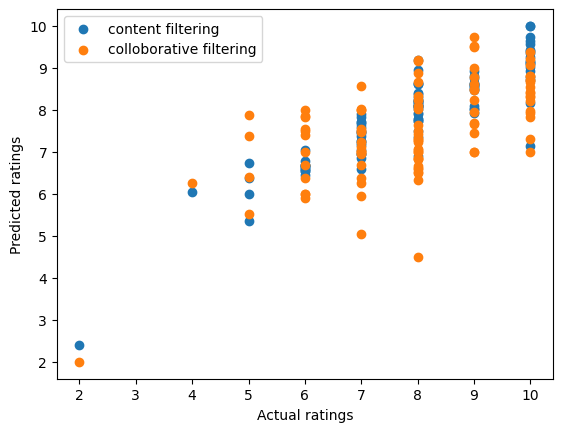

In [121]:
plt.scatter(test_sample.rating, test_sample.predicted_rating,label='content filtering')
plt.scatter(test_sample.rating, test_sample.predicted_rating_collab, label='colloborative filtering')
plt.ylabel('Predicted ratings')
plt.xlabel('Actual ratings')
plt.legend()
plt.show()

In [123]:
mse = mean_squared_error(test_sample['rating'], test_sample['predicted_rating'])
print(f"Mean Squared Error - Content Filtering: {mse}")
mse = mean_squared_error(test_sample['rating'], test_sample['predicted_rating_collab'])
print(f"Mean Squared Error - Collobarative Filtering: {mse}")

Mean Squared Error - Content Filtering: 0.5403506338464736
Mean Squared Error - Collobarative Filtering: 1.6502021973847762


Include time element as well, give an approximation for how long content and collobartive will run in streamlit

Content Filtering clearly performances better 

## 9. Streamlit <a class="anchor" id="chapter9"></a>

In [126]:
import pickle

In [127]:
with open('content_model.pkl', 'wb') as f: 
    pickle.dump(content_generate_rating_estimate, f)

In [128]:
with open('collab_model.pkl', 'wb') as f: 
    pickle.dump(collab_generate_rating_estimate, f)

## 10. Conclusion <a class="anchor" id="chapter10"></a>

> <b> Summary of Key Findings:</b> Recap the main insights and results discovered through the analysis. Highlight how these findings answer the initial questions or hypotheses set out in the introduction.

> <b> Evaluation of the Methodology:</b> Discuss the effectiveness of the methods and techniques used. Mention any limitations or challenges encountered during the analysis and how they were addressed or could be addressed in the future.

> <b> Implications of the Findings:</b> Explain the practical or theoretical implications of the results.Discuss how these findings can impact decision-making processes, policy, business strategies, or scientific understanding.

> <b> Suggestions for Future Work:</b> Propose areas for further research or additional questions that emerged from the project. Suggest improvements in data collection, analysis methods, or other aspects that could enhance future studies.

> <b> Reflection on the Data Source and Quality:</b> Reflect on the quality and reliability of the data used. Consider how the data source influenced the outcomes and what could be improved in terms of data quality or variety.

> <b>Concluding Thoughts:</b> Offer a final thought or summary statement that encapsulates the essence of the project and its impact. Encourage readers to consider broader applications or the next steps following from the project’s conclusions.